In [3]:
from sklearn.cluster import KMeans

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv('salary.csv', names = ['Name','Age','Salary'])

In [14]:
df

,Name,Age,Salary
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


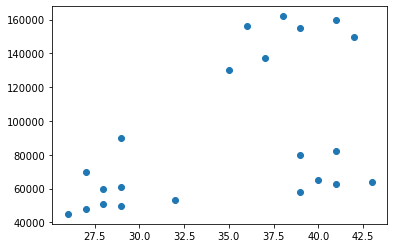

In [15]:
plt.scatter(df.Age,df.Salary)

In [16]:
km = KMeans(n_clusters = 3)

In [17]:
km

KMeans(n_clusters=3)

In [31]:
# Basically, fit_predict(x) is equivalent to fit(x).predict(x).
y_predicted = km.fit_predict(     df.drop('Name',axis = 1)    )

In [32]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [33]:
# lets append y_predicted to the original dataset
df['cluster'] = y_predicted

In [34]:
df

,Name,Age,Salary,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


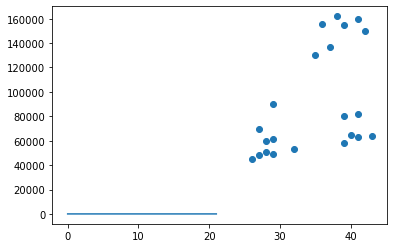

In [36]:
plt.scatter(df.Age,df.Salary)

In [37]:
df1 = df[df.cluster == 0]

In [38]:
df2 = df[df['cluster']==1]

In [39]:
df3 = df[df.cluster == 2]

Text(0, 0.5, 'Income')

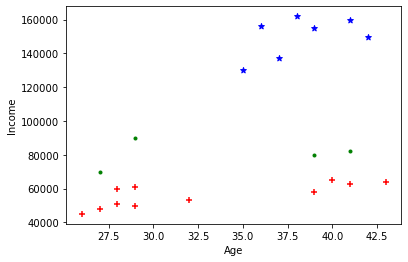

In [46]:
plt.scatter(df1.Age,df1.Salary,marker = '+',color = 'red')
plt.scatter(df2.Age,df2.Salary,marker = '*', color = 'blue')
plt.scatter(df3.Age,df3.Salary,marker = '.' ,color = 'green')
plt.xlabel('Age')
plt.ylabel('Income')

In [47]:
# from the plot we see that the blue cluster is ok. but the red and green are not proper
# the reason for it is that Age and Income are not scaled properly
#i.e. the scale Age is from 27.5 to 42.5 i.e. only 15
# the income scale is from 40k to 160k

(array([5., 6., 2., 2., 0., 0., 0., 2., 1., 4.]),
 array([ 45000.,  56700.,  68400.,  80100.,  91800., 103500., 115200.,
        126900., 138600., 150300., 162000.]),
 <a list of 10 Patch objects>)

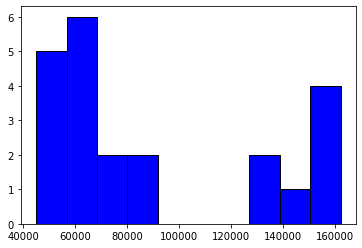

In [49]:
plt.hist(df['Salary'], color = 'blue', edgecolor = 'black')

(array([3., 5., 0., 1., 0., 2., 1., 4., 4., 2.]),
 array([26. , 27.7, 29.4, 31.1, 32.8, 34.5, 36.2, 37.9, 39.6, 41.3, 43. ]),
 <a list of 10 Patch objects>)

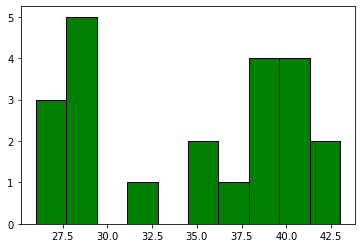

In [50]:
plt.hist(df['Age'],color = 'green',edgecolor = 'black')

In [51]:
# from the above both plot we can see that, none of them follows gausssian distribution.
# hence its better to normalize rather than standardize

In [52]:
from sklearn.preprocessing import MinMaxScaler 

In [54]:
scaler = MinMaxScaler()

In [70]:
dummy = df

In [71]:
dummy['Salary'] = scaler.fit_transform(df[['Salary']]) # requires 2d array

In [92]:
dummy['Age'] = scaler.fit_transform(df.Age.values.reshape(-1,1))

In [95]:
dummy_0= dummy[dummy.cluster == 0]
dummy_1 = dummy[dummy.cluster == 1]
dummy_2 = dummy[dummy.cluster == 2]

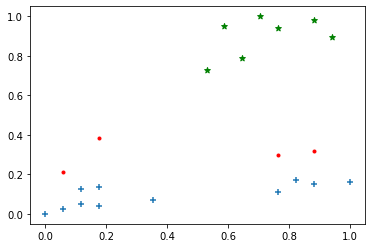

In [101]:
plt.scatter(dummy_0.Age,dummy_0.Salary,marker = '+')
plt.scatter(dummy_1.Age,dummy_1.Salary,marker = '*',color = 'green')
plt.scatter(dummy_2.Age,dummy_2.Salary,marker = '.',color = 'red')

In [115]:
km_1 = KMeans(n_clusters = 3)

In [124]:
dummy_y = km_1.fit_predict(dummy[ ['Age','Salary'] ] )

In [125]:
dummy['Cluster'] = dummy_y

In [126]:
dummy_0= dummy[dummy.Cluster == 0]
dummy_1 = dummy[dummy.Cluster == 1]
dummy_2 = dummy[dummy.Cluster == 2]

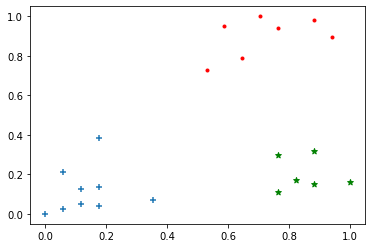

In [127]:
plt.scatter(dummy_0.Age,dummy_0.Salary,marker = '+')
plt.scatter(dummy_1.Age,dummy_1.Salary,marker = '*',color = 'green')
plt.scatter(dummy_2.Age,dummy_2.Salary,marker = '.',color = 'red')

In [113]:
dummy_y

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0])

In [114]:
dummy.Age

0     0.058824
1     0.176471
2     0.176471
3     0.117647
4     0.941176
5     0.764706
6     0.882353
7     0.705882
8     0.588235
9     0.529412
10    0.647059
11    0.000000
12    0.058824
13    0.117647
14    0.176471
15    0.352941
16    0.823529
17    0.882353
18    1.000000
19    0.764706
20    0.882353
21    0.764706
Name: Age, dtype: float64

In [123]:
# to get the centroids of the clusters
km_1.cluster_centers_

array([[0.84117647],
       [0.11029412],
       [0.52941176]])

In [135]:
c_1 = 0.84117647
c_2 = 0.11029412
c_3 = 0.52941176

In [130]:
dummy['Cluster'].value_counts()

0    9
2    7
1    6
Name: Cluster, dtype: int64

In [134]:
dummy_0

,Name,Age,Salary,cluster,Cluster
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
11,Tom,0.000000,0.000000,0,0
12,Arnold,0.058824,0.025641,0,0
13,Jared,0.117647,0.051282,0,0
14,Stark,0.176471,0.038462,0,0
15,Ranbir,0.352941,0.068376,0,0


In [137]:
k_range = range(1,10)

In [138]:
sse = []

In [140]:
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Salary']])
    sse.append(km.inertia_)

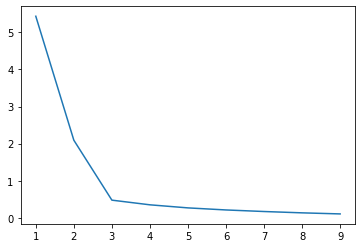

In [151]:
plt.plot(k_range,sse)

In [152]:
type(k_range)

range

In [155]:
ser = pd.Series(sse)

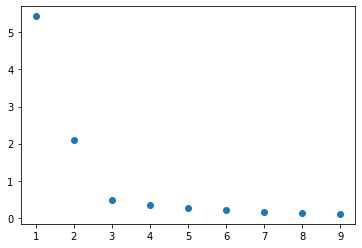

In [156]:
plt.scatter(k_range,ser)

TypeError: 'Series' object is not callable